# Covid model
This model is build drawing inspiration from SEIR model

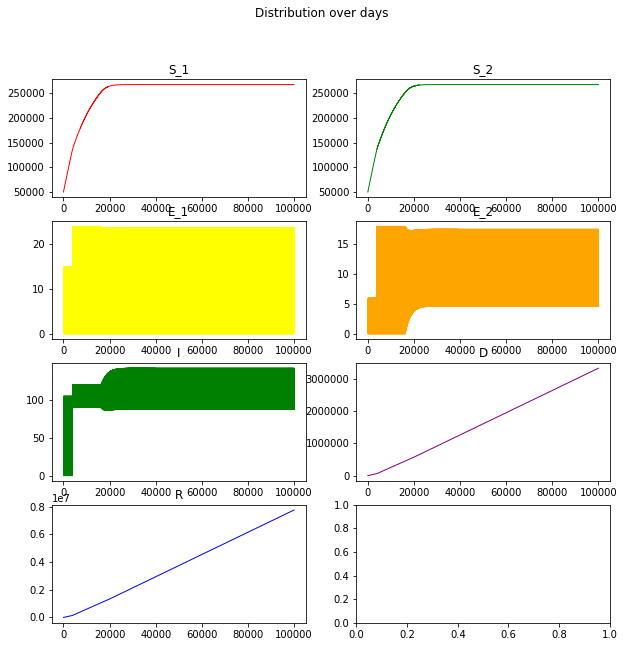

In [12]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import numpy as np

np.random.seed(19680801)

Ppl = 100001            #entire population
S = [Ppl/2,Ppl/2]       #Group1 use preventive measures, group2 doesn't
E = [0,0]
I = 1               #number of infected people.
D = 0               #number of death.
R = 0               #number of recovery
p_group = [0.5,0.2] #Rate of people in group i
p_s = 0.7           #Rate of people is normal.
lmbda = Ppl/4 + 100       #Population inflow
mu = Ppl/4            # Population outflow.
beta = 1.5          #Average risk per infected contact (R_0)
c = 1.1             #Average contacts per person per day (function of policies & time) (<1 means no spread of disease)
sigma = 5           #Incubation rate, at which infected people develops symptoms.
M = [[0.5,0.5],[0.5,0.5]]       #Per capita rate of migration of suspectible people from group i to j.
N = [[0.5,0.5],[0.5,0.5]]       #Per capita rate of migration of infected ones from group i to j.
p_d = 0.3           #The probability of death.
p_r = 1- p_d          #The probability of recovery.
alpha = 0

X=[]
I_res = []
S_1_res = []
S_2_res = []
E_1_res = []
E_2_res = []
D_res = []
R_res = []

for n in range(1, Ppl):
    X.append(n)
    S_1 = S[0] + (p_group[0] * p_s * (lmbda - mu)) - (beta * c * alpha * S[0] *(alpha * (E[0] + I) + E[1]))/Ppl + (M[1][0] * S[1]) - (M[0][1] * S[0])                       
    S_2 = S[1] + (p_group[1] * p_s * (lmbda - mu)) - (beta * c * S[1] *(alpha * (E[0] + I) + E[1]))/Ppl + (M[0][1] * S[0]) - (M[1][0] * S[1])                       
    E_1 = E[0] + (p_group[0] * (1 - p_s) * (lmbda - mu)) + (beta * c * alpha * S[0] *(alpha * (E[0] + I) + E[1]))/Ppl + (N[1][0] * E[1]) - ((N[0][1] + sigma) * E[0])                       
    E_2 = E[1] + (p_group[1] * (1 - p_s) * (lmbda - mu)) + (beta * c * S[1] *(alpha * (E[0] + I) + E[1]))/Ppl + (N[0][1] * E[0]) - ((N[1][0] + sigma) * E[1])                       
    I_1 = (sigma *(E[0] + E[1])) + (1 - p_r - p_d) * I 
    D_1 = D + p_d * I
    R_1 = R + p_r * I
    
    if(E_1<0): E_1=0
    if(E_2<0): E_2=0
    S_1_res.append(S[0])
    S_2_res.append(S[1])
    E_1_res.append(E[0])
    E_2_res.append(E[1])
    I_res.append(I)
    D_res.append(D)
    R_res.append(R)
    S = [S_1,S_2]
    E = [E_1,E_2]
    I = I_1
    D = D_1
    R = R_1


fig,ax = plt.subplots(4,2,figsize=(10,10))
fig.suptitle('Distribution over days')

# plot the function

ax[0, 0].set_title('S_1')
ax[0, 0].plot(X, S_1_res, linewidth=1, label="S_1",color="red")

ax[0, 1].set_title('S_2')
ax[0, 1].plot(X, S_2_res, linewidth=1, label="S_2",color="green")

ax[1, 0].set_title('E_1')
ax[1,0].plot(X, E_1_res, linewidth=1, label="E_1",color="yellow")

ax[1, 1].set_title('E_2')
ax[1,1].plot(X, E_2_res, linewidth=1, label="E_2",color="orange")

ax[2, 0].set_title('I')
ax[2,0].plot(X, I_res, linewidth=1, label="I",color="green")

ax[2, 1].set_title('D')
ax[2,1].plot(X, D_res, linewidth=1, label="D",color="purple")

ax[3, 0].set_title('R')
ax[3,0].plot(X, R_res, linewidth=1, label="R",color="blue")



plt.show()